In [ ]:
#!pip install requests
!pip install --upgrade scikit-learn
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

import joblib as jb

import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
from scipy.io import arff


#importo los modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#importo las métricas

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#Librerias de validacion cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import ipywidgets as widgets

#arboles
from sklearn import tree
from sklearn.tree import plot_tree

#bosque
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df=pd.read_csv('https://github.com/adiacla/bigdata/raw/master/adult.csv.zip')

In [ ]:
df

age  workclass  fnlwgt  education.num  marital.status  occupation  \
1       82          0  132870              9               0           0   
3       54          0  140359              4               1           1   
4       41          0  264663             10               2           2   
5       34          0  216864              9               1           3   
6       38          0  150601              6               2           4   
...    ...        ...     ...            ...             ...         ...   
32556   22          0  310152             10               3          11   
32557   27          0  257302             12               4          10   
32558   40          0  154374              9               4           1   
32559   58          0  151910              9               0           4   
32560   22          0  201490              9               3           4   

       relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
1                 0     0    0             0          4356              18   
3                 1     0    0             0          3900              40   
4                 2     0    0             0          3900              40   
5                 1     0    0             0          3770              45   
6                 1     0    1             0          3770              40   
...             ...   ...  ...           ...           ...             ...   
32556             0     0    1             0             0              40   
32557             5     0    0             0             0              38   
32558             4     0    1             0             0              40   
32559             1     0    0             0             0              40   
32560             2     0    1             0             0              20   

       native.country  income  
1                   0       0  
3                   0       0  
4                   0       0  
5                   0       0  
6                   0       0  
...               ...     ...  
32556               0       0  
32557               0       0  
32558               0       1  
32559               0       0  
32560               0       0  

[30162 rows x 14 columns]

#Analsis descriptivo de los datos


In [ ]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dado que todas las columnas son muericas no se requiere numerizar, hacer variables dummies, ni usar encoders.

In [ ]:
print(df["sex"].unique())

['Female' 'Male']


Cambiar valores a

Female = 0

Male = 1

In [ ]:


# Mostrar los valores únicos en la columna "sex" antes del cambio
print("Valores únicos en 'sex' antes del cambio:")
print(df["sex"].unique())

# Crear un diccionario de mapeo para los cambios
cambios = {'Female': 0, 'Male': 1}

# Aplicar el cambio utilizando el método replace en la columna "sex" del DataFrame df
df["sex"] = df["sex"].replace(cambios)
df['sex'] = df['sex'].astype(int)

# Mostrar los valores únicos en la columna "sex" después del cambio
print("\nValores únicos en 'sex' después del cambio:")
print(df["sex"].unique())


Valores únicos en 'sex' antes del cambio:
['Female' 'Male']

Valores únicos en 'sex' después del cambio:
[0 1]


In [ ]:
print(df["race"].unique())

['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


Cambiar valores a

White = 0

Black = 1

Asian-Pac-Islander = 2

Amer-Indian-Eskimo = 3

Other = 4

In [ ]:
# Mostrar los valores únicos en la columna "race" antes del cambio
print("Valores únicos en 'race' antes del cambio:")
print(df["race"].unique())
# Crear un diccionario de mapeo para los cambios
cambios_race = {
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
}

# Aplicar el cambio utilizando el método replace en la columna "race" del DataFrame df
df["race"] = df["race"].replace(cambios_race)
df['race'] = df['race'].astype(int)

# Mostrar los valores únicos en la columna "race" después del cambio
print("\nValores únicos en 'race' después del cambio:")
print(df["race"].unique())



Valores únicos en 'race' antes del cambio:
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Valores únicos en 'race' después del cambio:
[0 1 2 4 3]


In [ ]:
print(df["income"].unique())

['<=50K' '>50K']


Cambiar valores a

<=50K = 0

->50K = 1

In [ ]:


# Mostrar los valores únicos en la columna "income" antes del cambio
print("Valores únicos en 'income' antes del cambio:")
print(df["income"].unique())

# Crear un diccionario de mapeo para los cambios
cambios_income = {
    '<=50K': 0,
    '>50K': 1
}

# Aplicar el cambio utilizando el método replace en la columna "income" del DataFrame df
df["income"] = df["income"].replace(cambios_income)
df['income'] = df['income'].astype(int)

# Mostrar los valores únicos en la columna "income" después del cambio
print("\nValores únicos en 'income' después del cambio:")
print(df["income"].unique())


Valores únicos en 'income' antes del cambio:
['<=50K' '>50K']

Valores únicos en 'income' después del cambio:
[0 1]


In [ ]:
print(df["workclass"].unique())

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


Cambiar valores a

? = Borrar datos

Private = 0

State-gov = 1

Federal-gov = 2

self-emp-not-inc = 3

Self-emp-inc = 4

Local-gov = 5

Without-pay = 6

Never-worked = 7

In [ ]:


# Mostrar los valores únicos en la columna "workclass" antes del cambio
print("Valores únicos en 'workclass' antes del cambio:")
print(df["workclass"].unique())

# Crear un diccionario de mapeo para los cambios
cambios_workclass = {
    'Private': 0,
    'State-gov': 1,
    'Federal-gov': 2,
    'Self-emp-not-inc': 3,
    'Self-emp-inc': 4,
    'Local-gov': 5,
    'Without-pay': 6,
    'Never-worked': 7
}

# Aplicar el cambio utilizando el método replace en la columna "workclass" del DataFrame df
df["workclass"] = df["workclass"].replace(cambios_workclass)
df = df.drop(df[df['workclass'] == '?'].index)
df['workclass'] = df['workclass'].astype(int)

# Mostrar los valores únicos en la columna "workclass" después del cambio
print("\nValores únicos en 'workclass' después del cambio:")
print(df["workclass"].unique())


Valores únicos en 'workclass' antes del cambio:
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Valores únicos en 'workclass' después del cambio:
[0 1 2 3 4 5 6 7]


In [ ]:
print(df["workclass"].head())

1    0
3    0
4    0
5    0
6    0
Name: workclass, dtype: int64


In [ ]:
print(df["education"].unique())

['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']


Borrar

In [ ]:
print(df["education"])

1             HS-grad
3             7th-8th
4        Some-college
5             HS-grad
6                10th
             ...     
32556    Some-college
32557      Assoc-acdm
32558         HS-grad
32559         HS-grad
32560         HS-grad
Name: education, Length: 30725, dtype: object


In [ ]:

# Mostrar el DataFrame df antes de borrar la columna "education"
print("DataFrame antes de borrar la columna 'education':")
print(df)

# Borrar la columna "education" del DataFrame df
df = df.drop("education", axis=1)

# Mostrar el DataFrame df después de borrar la columna "education"
print("\nDataFrame después de borrar la columna 'education':")
print(df)


DataFrame antes de borrar la columna 'education':
       age  workclass  fnlwgt     education  education.num  \
1       82          0  132870       HS-grad              9   
3       54          0  140359       7th-8th              4   
4       41          0  264663  Some-college             10   
5       34          0  216864       HS-grad              9   
6       38          0  150601          10th              6   
...    ...        ...     ...           ...            ...   
32556   22          0  310152  Some-college             10   
32557   27          0  257302    Assoc-acdm             12   
32558   40          0  154374       HS-grad              9   
32559   58          0  151910       HS-grad              9   
32560   22          0  201490       HS-grad              9   

           marital.status         occupation   relationship  race  sex  \
1                 Widowed    Exec-managerial  Not-in-family     0    0   
3                Divorced  Machine-op-inspct      Unmarri

In [ ]:
print(df["education.num"].unique())

[ 9  4 10  6 16 15 13 14  7 12 11  2  3  8  5  1]


Valores equivalentes a

1 = Preschool

2 = 1st-4th

3 = 5th-6th

4 = 7th-8th

5 = 9th

6 = 10th

7 = 11th

8 = 12th

9 = HS-grad

10 = Some-college

11 = Assoc-voc

12 = Assoc-acdm

13 = Bachelors

14 = Masters

15 = Prof-school

16 = Doctorate

In [ ]:
print(df["marital.status"].unique())

['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']


Valores equivalentes a


Widowed = 0

Divorced = 1

Separated = 2

Never-married = 3

Married-civ-spouse = 4

Married-spouse-absent = 5

Married-AF-spouse = 6

In [ ]:
# Mostrar los valores únicos en la columna "marital.status" antes del cambio
print("Valores únicos en 'marital.status' antes del cambio:")
print(df["marital.status"].unique())

# Crear un diccionario de mapeo para los cambios
cambios_marital_status = {
    'Widowed' : 0,
    'Divorced' : 1,
    'Separated' : 2,
    'Never-married' : 3,
    'Married-civ-spouse' : 4,
    'Married-spouse-absent' : 5,
    'Married-AF-spouse' : 6
}

# Aplicar el cambio utilizando el método replace en la columna "marital.status" del DataFrame df
df["marital.status"] = df["marital.status"].replace(cambios_marital_status)
df['marital.status'] = df['marital.status'].astype(int)

# Mostrar los valores únicos en la columna "marital.status" después del cambio
print("\nValores únicos en 'marital.status' después del cambio:")
print(df["marital.status"].unique())

Valores únicos en 'marital.status' antes del cambio:
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Valores únicos en 'marital.status' después del cambio:
[0 1 2 3 4 5 6]


In [ ]:
print(df["occupation"].unique())

['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv' '?']


Valores equivalentes a

? = borrar

Exec-managerial = 0

Machine-op-inspct = 1

Prof-specialty = 2

Other-service = 3

Adm-clerical = 4

Craft-repair = 5

Transport-moving = 6

Handlers-cleaners = 7

Sales = 8

Farming-fishing = 9

Tech-support = 10

Protective-serv = 11

Armed-Forces = 12

Priv-house-serv = 13

In [ ]:
# Mostrar los valores únicos en la columna "occupation" antes del cambio
print("Valores únicos en 'occupation' antes del cambio:")
print(df["occupation"].unique())

# Crear un diccionario de mapeo para los cambios
cambios_occupation = {
    'Exec-managerial': 0,
    'Machine-op-inspct': 1,
    'Prof-specialty': 2,
    'Other-service': 3,
    'Adm-clerical': 4,
    'Craft-repair': 5,
    'Transport-moving': 6,
    'Handlers-cleaners': 7,
    'Sales': 8,
    'Farming-fishing': 9,
    'Tech-support': 10,
    'Protective-serv': 11,
    'Armed-Forces': 12,
    'Priv-house-serv': 13
}

# Aplicar el cambio utilizando el método replace en la columna "occupation" del DataFrame df
df["occupation"] = df["occupation"].replace(cambios_occupation)
df = df.drop(df[df['occupation'] == '?'].index)
df['occupation'] = df['occupation'].astype(int)

# Mostrar los valores únicos en la columna "occupation" después del cambio
print("\nValores únicos en 'occupation' después del cambio:")
print(df["occupation"].unique())


Valores únicos en 'occupation' antes del cambio:
['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv' '?']

Valores únicos en 'occupation' después del cambio:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [ ]:
print(df["relationship"].unique())

['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']


Valores equivalentes a

Not-in-family = 0

Unmarried = 1

Own-child = 2

Other-relative = 3

Husband = 4

Wife = 5

In [ ]:
# Mostrar los valores únicos en la columna "relationship" antes del cambio
print("Valores únicos en 'relationship' antes del cambio:")
print(df["relationship"].unique())

# Crear un diccionario de mapeo para los cambios
cambios_relationship = {
    'Not-in-family': 0,
    'Unmarried': 1,
    'Own-child': 2,
    'Other-relative': 3,
    'Husband': 4,
    'Wife': 5
}

# Aplicar el cambio utilizando el método replace en la columna "relationship" del DataFrame df
df["relationship"] = df["relationship"].replace(cambios_relationship)
df['relationship'] = df['relationship'].astype(int)

# Mostrar los valores únicos en la columna "relationship" después del cambio
print("\nValores únicos en 'relationship' después del cambio:")
print(df["relationship"].unique())

Valores únicos en 'relationship' antes del cambio:
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Valores únicos en 'relationship' después del cambio:
[0 1 2 3 4 5]


In [ ]:
print(df["capital.gain"].unique())

[    0 99999 41310 34095 27828 25236 25124 22040 20051 18481 15831 15024
 15020 14344 14084 13550 11678 10605 10566 10520  9562  9386  8614  7978
  7896  7688  7443  7430  7298  6849  6767  6723  6514  6497  6418  6360
  6097  5721  5556  5455  5178  5060  5013  4934  4931  4865  4787  4687
  4650  4508  4416  4386  4101  4064  3942  3908  3887  3818  3781  3674
  3471  3464  3456  3432  3418  3411  3325  3273  3137  3103  2993  2977
  2964  2961  2936  2907  2885  2829  2653  2635  2597  2580  2538  2463
  2414  2407  2387  2354  2346  2329  2290  2228  2202  2176  2174  2105
  2062  2050  2036  2009  1848  1831  1797  1639  1506  1471  1455  1424
  1409  1173  1151  1086  1055   991   914   594   401   114]


In [ ]:
print(df["capital.loss"].unique())

[4356 3900 3770 3683 3004 2824 2754 2603 2559 2547 2472 2467 2457 2444
 2415 2392 2377 2352 2339 2282 2267 2258 2246 2238 2231 2206 2205 2201
 2179 2174 2149 2129 2080 2057 2051 2042 2002 2001 1980 1977 1974 1944
 1902 1887 1876 1848 1844 1825 1816 1762 1755 1741 1740 1735 1726 1721
 1719 1672 1669 1668 1651 1648 1628 1617 1602 1594 1590 1579 1573 1564
 1539 1504 1485 1411 1408 1380 1340 1258 1138 1092  974  880  810  653
  625  419  323  213  155    0]


In [ ]:
print(df["hours.per.week"].unique())

[18 40 45 20 60 35 55 76 50 42 25 32 90 48 70 52 72 39  6 65 80 67 99 30
 75 12 26 10 84 38 62 44  8 28 59  5 24 57 34 37 46 56 41 98 43 15 63  1
 36 47 68 54  2 16  9  3  4 33 23 22 64 51 19 58 53 96 66 21  7 13 27 14
 77 31 78 11 49 17 85 87 88 73 89 97 94 29 82 86 91 81 92 61 74 95]


In [ ]:
print(df["native.country"].unique())

['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'Hungary' 'Columbia' 'Guatemala'
 'El-Salvador' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Portugal' 'Laos'
 'Thailand' 'Outlying-US(Guam-USVI-etc)' 'Scotland']


Valores equivalentes a

United-States = 0

? = borrar

Mexico = 1

Greece = 2

Vietnam = 3

China = 4

Taiwan = 5

India = 6

Philippines = 7

Trinadad&Tobago = 8

Canada = 9

South = 10

Holand-Netherlandsn = 11

Puerto-Rico = 12

Poland = 13

Iran = 14

England = 15

Germany = 16

Italy = 17

Japan = 18

Hong = 19

Honduras = 20

Cuba = 21

Ireland = 22

Cambodia = 23

Peru = 24

Nicaragua = 25

Dominican-Republic = 26

Haiti = 27

El-Salvador = 28

Hungary = 29

Columbia = 30

Guatemala = 31

Jamaica = 32

Ecuador = 33

France = 34

Yugoslavia = 35

Scotland = 36

Portugal = 37

Laos = 38

Thailand = 39

Outlying-US(Guam-USVI-etc) = 40

In [ ]:
# Mostrar los valores únicos en la columna "native.country" antes del cambio
print("Valores únicos en 'native.country' antes del cambio:")
print(df["native.country"].unique())

# Crear un diccionario de mapeo para los cambios
cambios_native_country = {
    'United-States': 0,
    'Mexico': 1,
    'Greece': 2,
    'Vietnam': 3,
    'China': 4,
    'Taiwan': 5,
    'India': 6,
    'Philippines': 7,
    'Trinadad&Tobago': 8,
    'Canada': 9,
    'South': 10,
    'Holand-Netherlands': 11,
    'Puerto-Rico': 12,
    'Poland': 13,
    'Iran': 14,
    'England': 15,
    'Germany': 16,
    'Italy': 17,
    'Japan': 18,
    'Hong': 19,
    'Honduras': 20,
    'Cuba': 21,
    'Ireland': 22,
    'Cambodia': 23,
    'Peru': 24,
    'Nicaragua': 25,
    'Dominican-Republic': 26,
    'Haiti': 27,
    'El-Salvador': 28,
    'Hungary': 29,
    'Columbia': 30,
    'Guatemala': 31,
    'Jamaica': 32,
    'Ecuador': 33,
    'France': 34,
    'Yugoslavia': 35,
    'Scotland': 36,
    'Portugal': 37,
    'Laos': 38,
    'Thailand': 39,
    'Outlying-US(Guam-USVI-etc)': 40
}

# Aplicar el cambio utilizando el método replace en la columna "native.country" del DataFrame df
df["native.country"] = df["native.country"].replace(cambios_native_country)
df = df.drop(df[df['native.country'] == '?'].index)
df['native.country'] = df['native.country'].astype(int)

# Mostrar los valores únicos en la columna "native.country" después del cambio
print("\nValores únicos en 'native.country' después del cambio:")
print(df["native.country"].unique())

Valores únicos en 'native.country' antes del cambio:
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'Hungary' 'Columbia' 'Guatemala'
 'El-Salvador' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Portugal' 'Laos'
 'Thailand' 'Outlying-US(Guam-USVI-etc)' 'Scotland']

Valores únicos en 'native.country' después del cambio:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 28 32 33 34 35 37 38 39 40 36]


**Se realizan cambios necesitados**

In [ ]:
columnas=df.columns

In [ ]:
df

age  workclass  fnlwgt  education.num  marital.status  occupation  \
1       82          0  132870              9               0           0   
3       54          0  140359              4               1           1   
4       41          0  264663             10               2           2   
5       34          0  216864              9               1           3   
6       38          0  150601              6               2           4   
...    ...        ...     ...            ...             ...         ...   
32556   22          0  310152             10               3          11   
32557   27          0  257302             12               4          10   
32558   40          0  154374              9               4           1   
32559   58          0  151910              9               0           4   
32560   22          0  201490              9               3           4   

       relationship  race  sex  capital.gain  capital.loss  hours.per.week  \
1                 0     0    0             0          4356              18   
3                 1     0    0             0          3900              40   
4                 2     0    0             0          3900              40   
5                 1     0    0             0          3770              45   
6                 1     0    1             0          3770              40   
...             ...   ...  ...           ...           ...             ...   
32556             0     0    1             0             0              40   
32557             5     0    0             0             0              38   
32558             4     0    1             0             0              40   
32559             1     0    0             0             0              40   
32560             2     0    1             0             0              20   

       native.country  income  
1                   0       0  
3                   0       0  
4                   0       0  
5                   0       0  
6                   0       0  
...               ...     ...  
32556               0       0  
32557               0       0  
32558               0       1  
32559               0       0  
32560               0       0  

[30162 rows x 14 columns]

#Analisis de correrlacion de los datos


Se realizan graficas para ver la correlación entre las variables

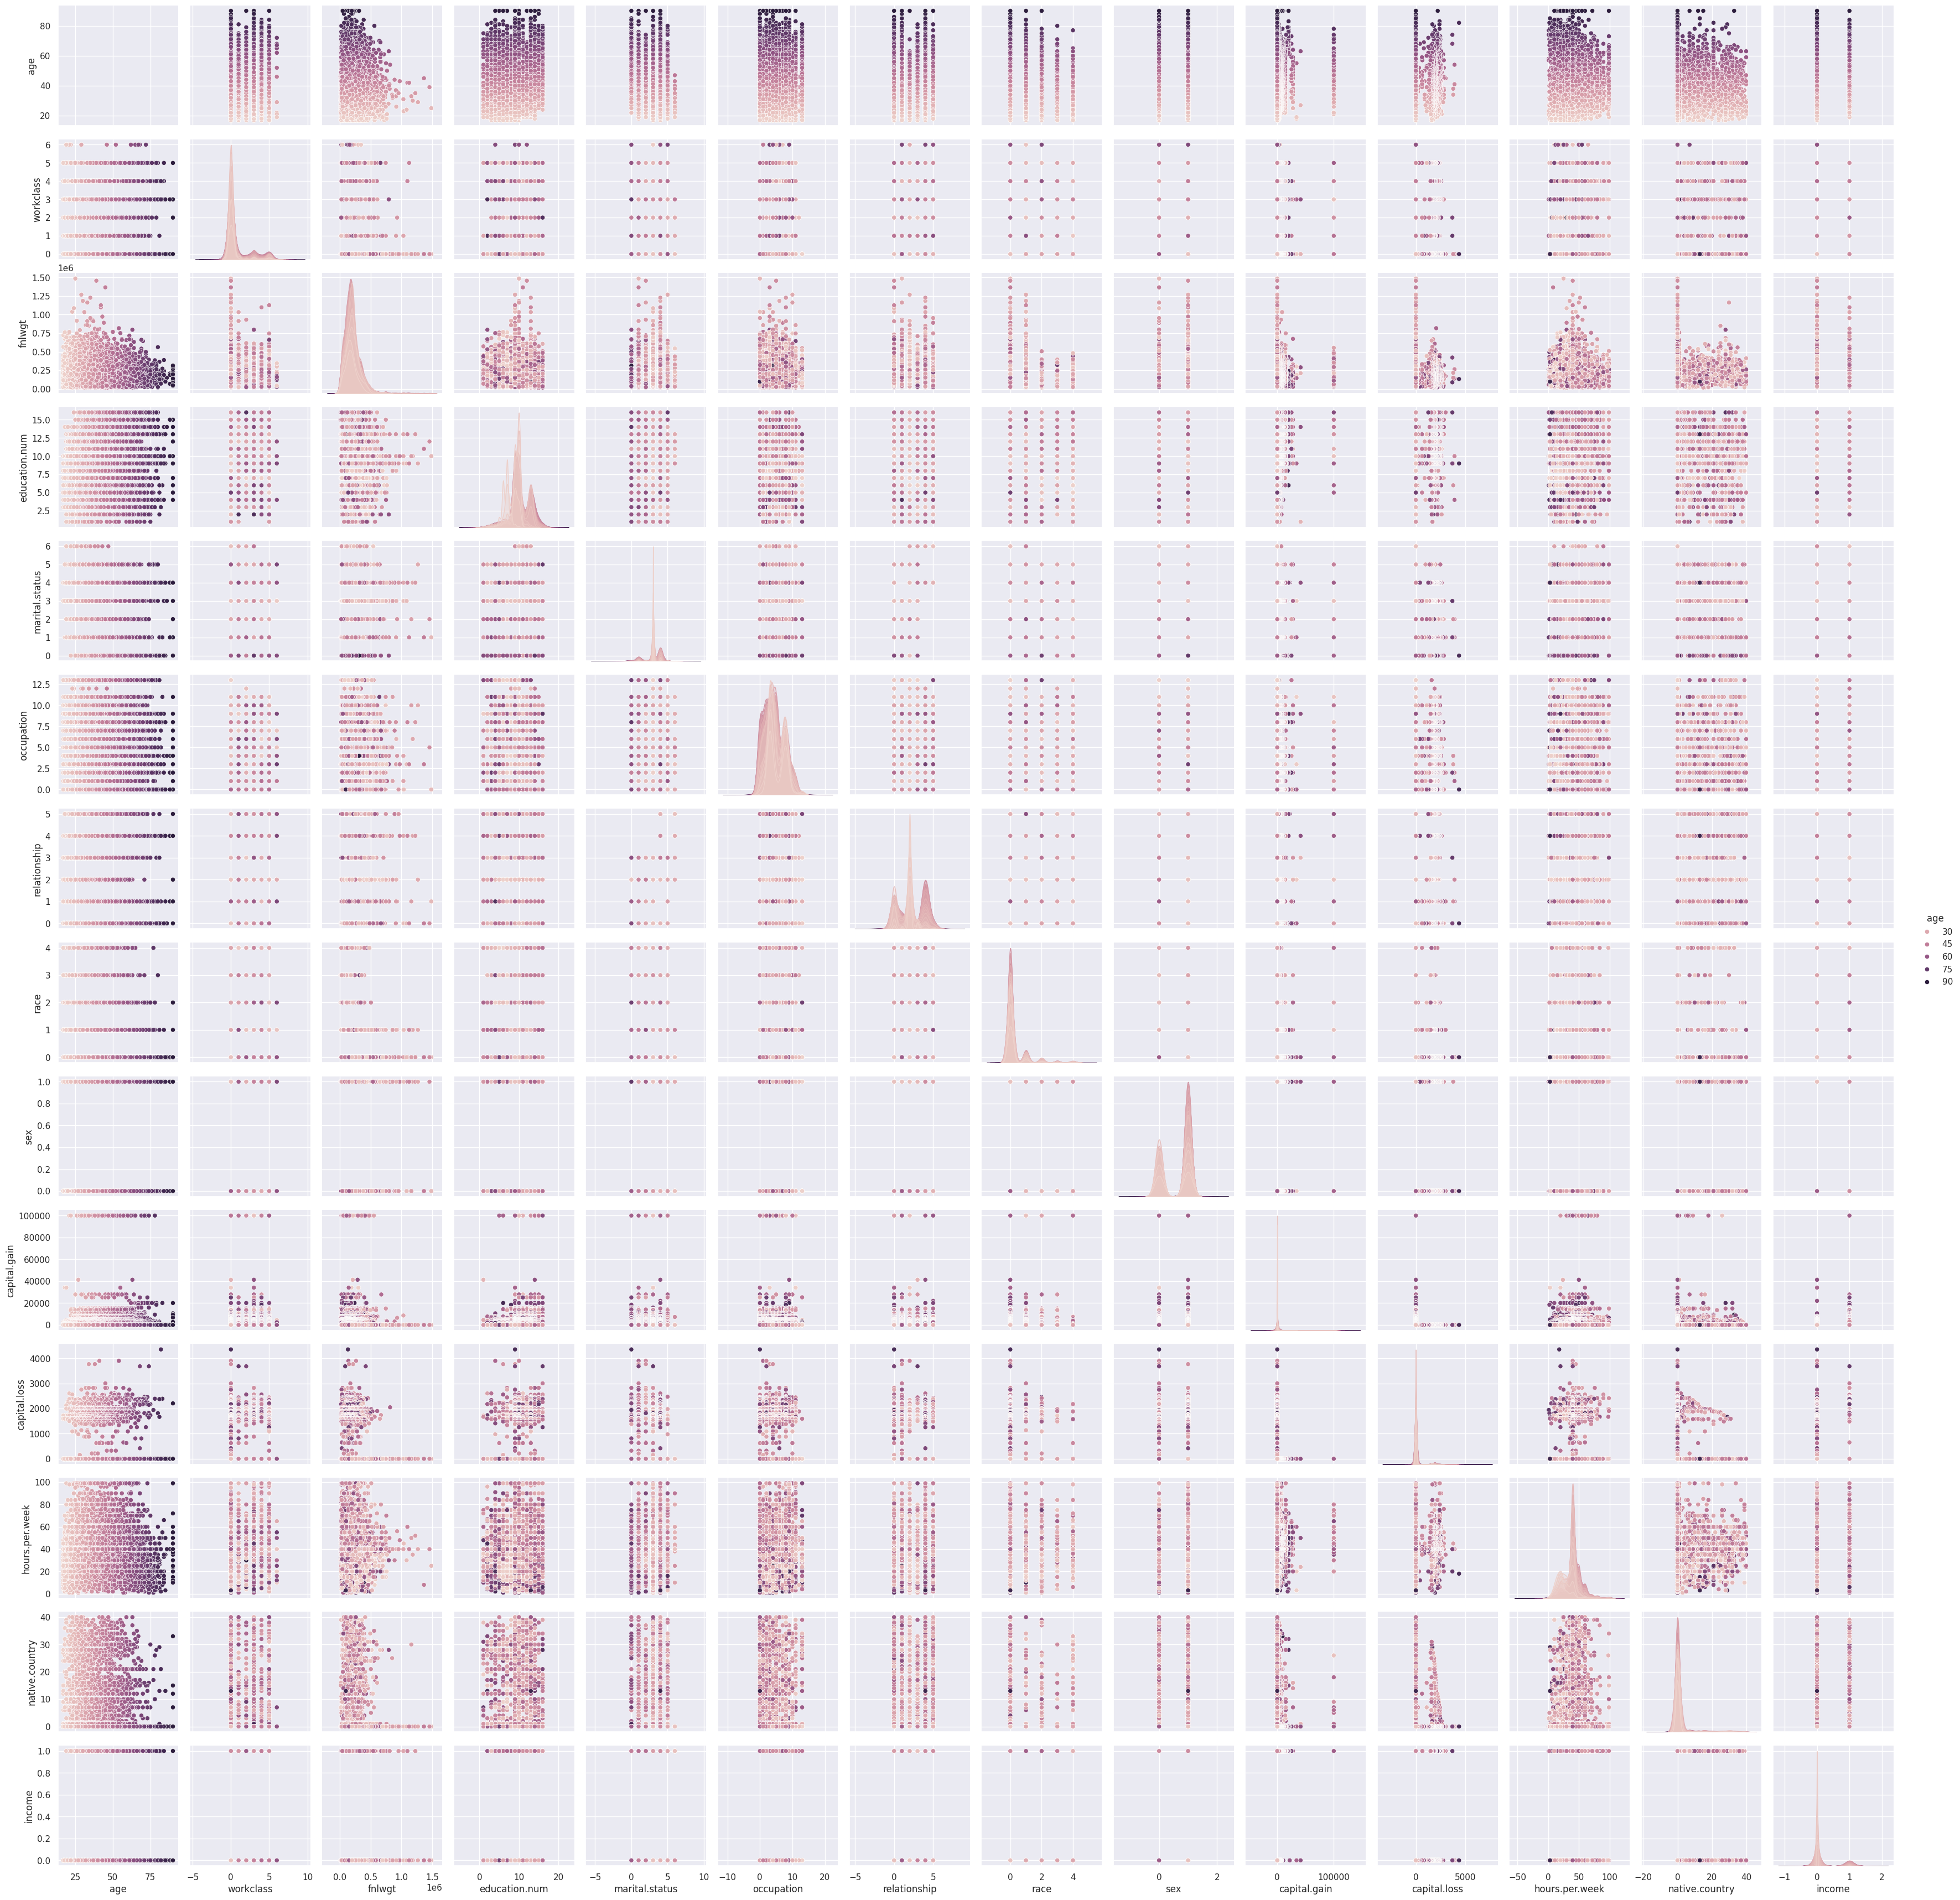

In [ ]:
sns.set()
sns.pairplot(df, hue="age",vars=columnas)
plt.show()

In [ ]:
features=['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income']

In [ ]:
print(columnas)

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')


In [ ]:
corr_matrix=df[features].corr()

Anlisis de varianza

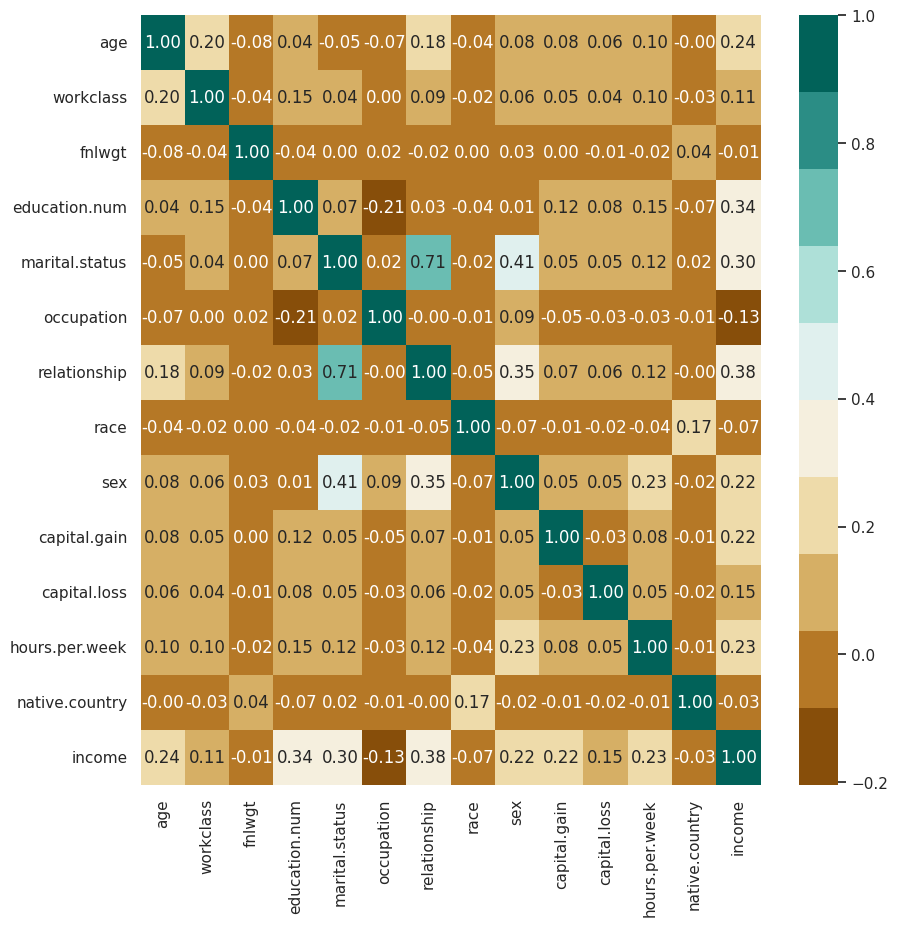

In [ ]:
fig, ax=plt.subplots(figsize=(10,10)) #SIEMPRE
colormap=sns.color_palette("BrBG",10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

Selcionar datos para entrenar el modelo, en este caso se escogio la variable de sexo

In [ ]:
X=df.drop("sex", axis=1)
y=df["sex"]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=325425)

In [ ]:
df.sex.value_counts()

1    20380
0     9782
Name: sex, dtype: int64

Resulta que hay casi el doble de hobres que mujeres dentro de los datos.

Tamaño de la información que se uso para entrenar el modelo

In [ ]:
len(df),len(X_train),len(y_train),len(X_test),len(y_test)

(30162, 24129, 24129, 6033, 6033)

Se mide la varianza

In [ ]:
df.var()

age               1.725194e+02
workclass         2.505019e+00
fnlwgt            1.116255e+10
education.num     6.502474e+00
marital.status    1.348417e+00
occupation        9.267276e+00
relationship      3.090934e+00
race              3.751090e-01
sex               2.191422e-01
capital.gain      5.485397e+07
capital.loss      1.634572e+05
hours.per.week    1.435200e+02
native.country    2.641776e+01
income            1.869663e-01
dtype: float64

<Axes: ylabel='age'>

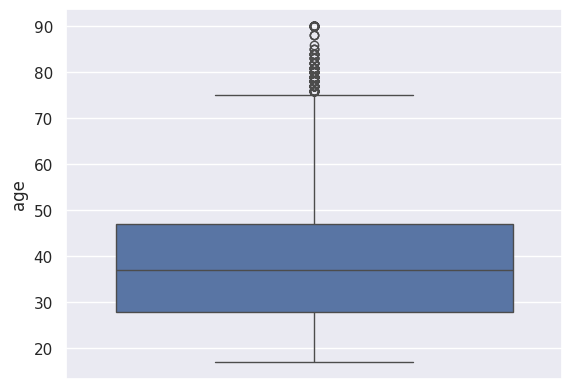

In [ ]:
sns.boxplot(y='age', data=df)

Datos anomalicos no son relevantes debido a que una de edad de 90 son normales, solo es que el promedio de edades se muy bajo (cerca a 40)

<Axes: >

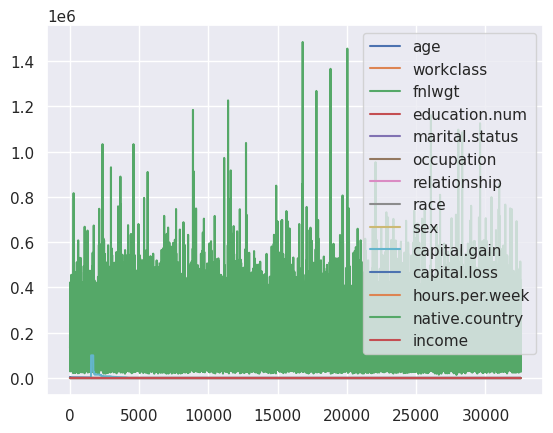

In [ ]:
df.plot()

<Axes: ylabel='fnlwgt'>

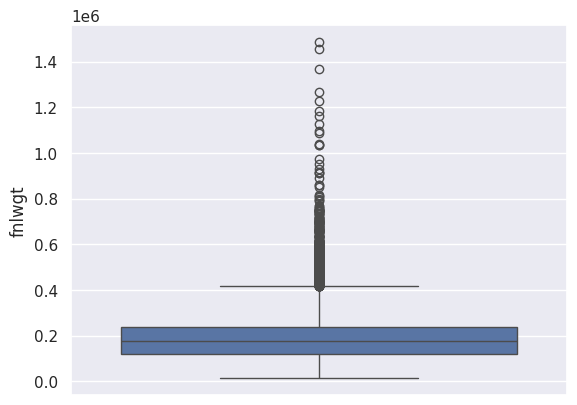

In [ ]:
sns.boxplot(y='fnlwgt', data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   fnlwgt          30162 non-null  int64
 3   education.num   30162 non-null  int64
 4   marital.status  30162 non-null  int64
 5   occupation      30162 non-null  int64
 6   relationship    30162 non-null  int64
 7   race            30162 non-null  int64
 8   sex             30162 non-null  int64
 9   capital.gain    30162 non-null  int64
 10  capital.loss    30162 non-null  int64
 11  hours.per.week  30162 non-null  int64
 12  native.country  30162 non-null  int64
 13  income          30162 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


Se realizan graficas para ver la correlación entre el income y los otros valores

Text(0.5, 0.98, 'Box Plot de todos los Feature')

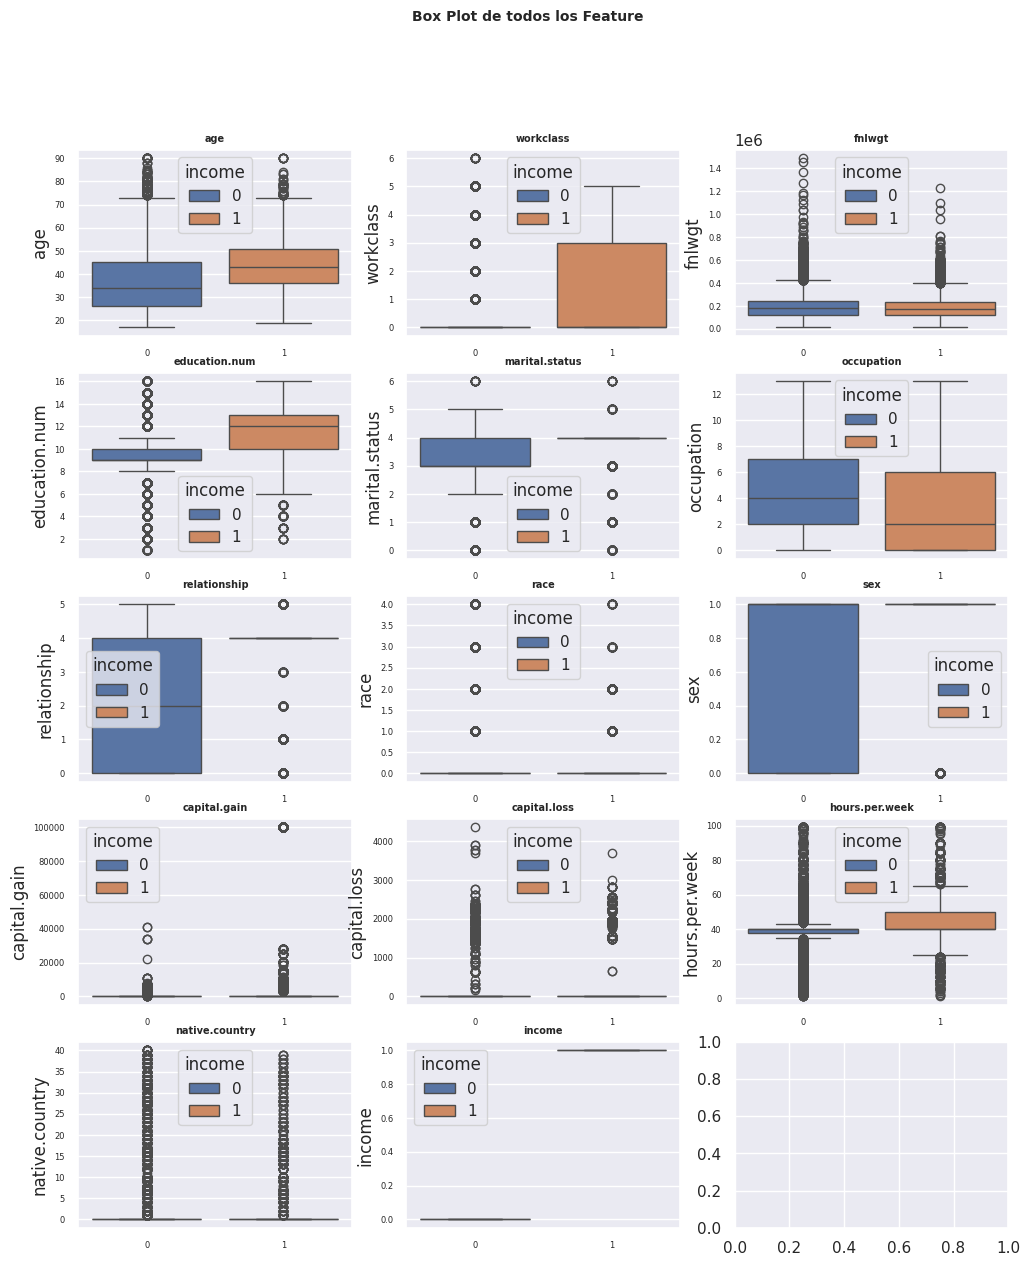

In [ ]:
columnas=df.select_dtypes(include='int').columns


fig,axes=plt.subplots(nrows=5, ncols=3, figsize=(12,14))
axes=axes.flat

for i,columna in enumerate(columnas):
  sns.boxplot(x='income', y=columna, data=df, hue='income',ax=axes[i])
  axes[i].set_title(columna,fontsize=7,fontweight="bold")
  axes[i].tick_params(labelsize=6)
  axes[i].set_xlabel("")

fig.suptitle("Box Plot de todos los Feature", fontsize=10, fontweight="bold")

Se realizan graficas para obvservar la densidad de datos (como estan distribuidos)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

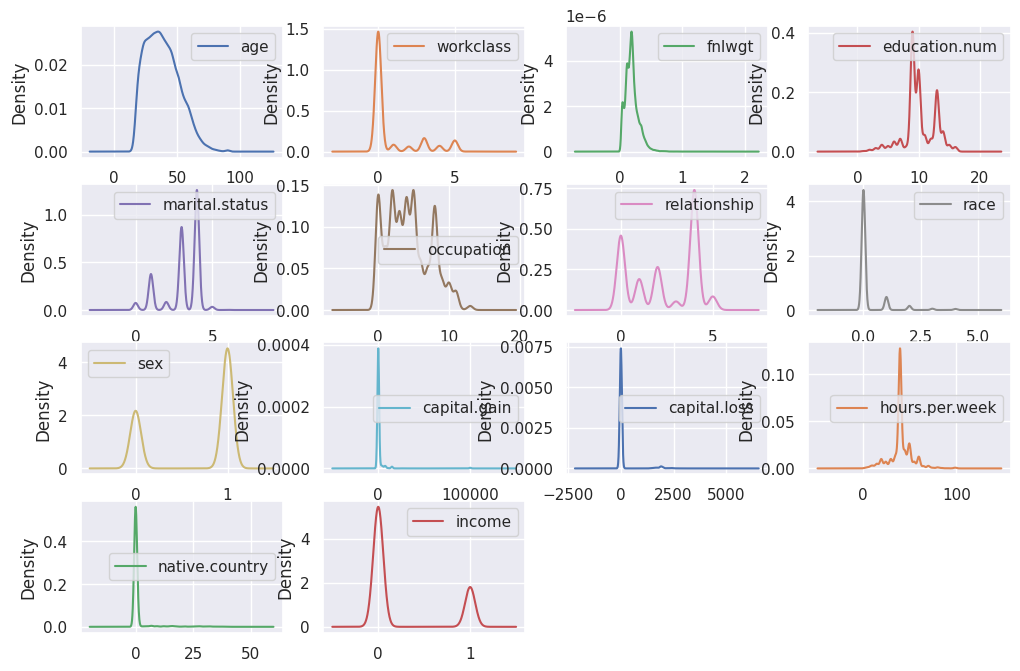

In [ ]:
df.plot(kind='density', subplots=True, layout=(6,4), figsize=(12,12), sharex=False)

Grafica de relación entre edad, raza e ingresos

In [ ]:
colors=np.where(df["sex"]==0,"green","red")
def angulo (x,y):
  fig=plt.figure(figsize=(9,10))
  ax=fig.add_subplot(projection='3d')
  ax.scatter(df["age"],df["race"],df["income"], c=colors, marker="*")
  ax.fontsize=5,
  ax.view_init(x,y)
  ax.set_xlabel("age")
  ax.set_ylabel("race")
  ax.set_zlabel("income")
  plt.show()

grafico=widgets.interact(angulo,x=[60,-90,-45,0,30,45,90], y=[60,-90,-45,30,0,30,45,90])


interactive(children=(Dropdown(description='x', options=(60, -90, -45, 0, 30, 45, 90), value=60), Dropdown(des…

In [ ]:
modeloNB=GaussianNB()

entrenamiento del modelo

In [ ]:
modeloNB.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = modeloNB.predict(X_test)

In [ ]:
y_train.value_counts()

1    16304
0     7825
Name: sex, dtype: int64

In [ ]:
#Descargar el Archivo del Modelo
import joblib as jb
jb.dump(modeloNB,"modeloNB2.bin",compress=True)

['modeloNB2.bin']

In [ ]:
y_prect=modeloNB.predict(X_test)
y_prect

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
y_test.values

array([1, 0, 1, ..., 0, 1, 1])

Se saca el porcentaje de datos correctos

In [ ]:
modeloNB.score(X_test,y_test)

0.6850654732305652

Sacar la curva ROC para observar cual es el comportamiento del modelo en respecto a la tasa de falsos positivos

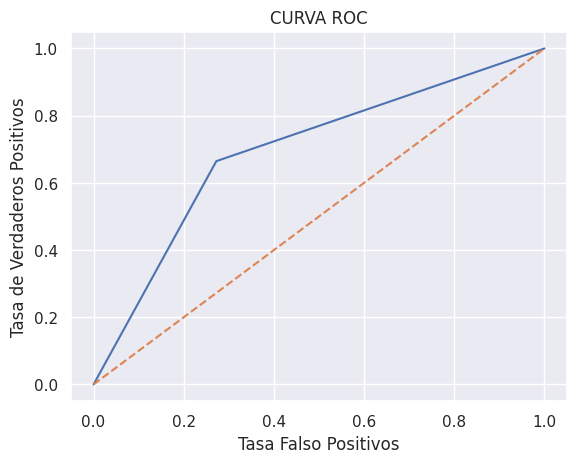

In [ ]:
fpr,tpr,umbral=roc_curve(y_test,y_prect)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falso Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("CURVA ROC")
plt.show()

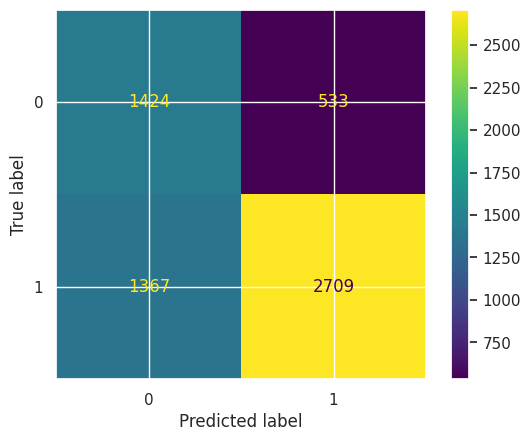

In [ ]:
matrix=confusion_matrix(y_test,y_prect)
mostrarMatrix=ConfusionMatrixDisplay(confusion_matrix= matrix,display_labels=modeloNB.classes_)
mostrarMatrix.plot()

tabla de falsos positivos

In [ ]:
print("Area bajo la curva",auc(fpr,tpr))

Area bajo la curva 0.6961332661044648


| Verdaderos positivos | Falsos Positivos |

---

| Falsos negativos |Verdaderos negativos |


In [ ]:
print(classification_report(y_test,y_prect))

              precision    recall  f1-score   support

           0       0.51      0.73      0.60      1957
           1       0.84      0.66      0.74      4076

    accuracy                           0.69      6033
   macro avg       0.67      0.70      0.67      6033
weighted avg       0.73      0.69      0.69      6033



In [ ]:
Kpliegues=KFold(n_splits=5)
scores=cross_val_score(modeloNB,X_train,y_train,cv=Kpliegues)
print("Score Naive Bayes con Cross Validation",scores)
print("Promedio de los Scores",scores.mean())
print("Varianza de los Scores",scores.var())
print("Número de Pliegues Usados",len(scores))

Score Naive Bayes con Cross Validation [0.712184   0.68358889 0.68711148 0.67633651 0.68227979]
Promedio de los Scores 0.6883001359217881
Varianza de los Scores 0.00015468413891567333
Número de Pliegues Usados 5


In [ ]:
cross_val_predict(modeloNB,X_train,y_train,cv=Kpliegues)

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
y_train

2089     1
29280    0
19496    1
25486    1
10948    1
        ..
30998    1
12545    0
4467     0
13106    1
28855    0
Name: sex, Length: 24129, dtype: int64

# Arboles de descision

In [ ]:
#IMPORTO LOS MODELOS
from sklearn import tree
from sklearn.model_selection import train_test_split

#Plotear el arbol de decision
from sklearn.tree import plot_tree

In [ ]:
#Declarar la instancia del modelo
modeloArbol=tree.DecisionTreeClassifier(criterion='entropy',
                                        min_samples_split=5,
                                        min_samples_leaf=4,
                                        max_depth=5, random_state=444)

In [ ]:
#Entrenar el modelo, fit()
modeloArbol.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=5, random_state=444)

In [ ]:
import joblib as jb
jb.dump(modeloArbol, "ModeloArbol.bin", compress=True)

['ModeloArbol.bin']

In [ ]:
#The classes labels
modeloArbol.classes_

array([0, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

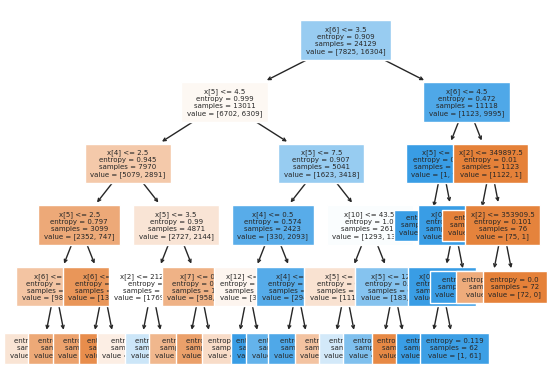

In [ ]:
tree.plot_tree(modeloArbol,filled=True, fontsize=5)
plt.savefig("mi_arbol.jpg")
plt.show

In [ ]:
modeloArbol.max_features_

13

In [ ]:
prediccion=modeloArbol.predict(X_test)
prediccion

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
print(tree.export_text(modeloArbol,feature_names=['age', 'workclass', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income']))

|--- race <= 3.50
|   |--- relationship <= 4.50
|   |   |--- occupation <= 2.50
|   |   |   |--- relationship <= 2.50
|   |   |   |   |--- race <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- race >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- relationship >  2.50
|   |   |   |   |--- race <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- race >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- occupation >  2.50
|   |   |   |--- relationship <= 3.50
|   |   |   |   |--- education.num <= 212896.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- education.num >  212896.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- relationship >  3.50
|   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sex >  0.50
|   |   |   |   |   |--- class: 0
|   |--- relationship >  4.50
|   |   |--- relationship <= 7.50
|   |   |   |--- occupation <= 0.50
|   |   |   |   |--- income <= 0.50
|   |   |   |   |   |--- class

In [ ]:
modeloArbol.score(X_test,y_test)

0.8246311950936516

In [ ]:
#Se crea una tabla con los datos de la matriz
matrix=confusion_matrix(y_test,y_prect)
matrix

array([[1424,  533],
       [1367, 2709]])

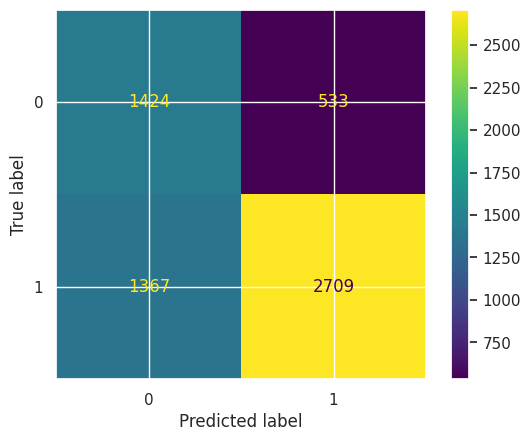

In [ ]:
matrix=confusion_matrix(y_test,y_prect)
mostrarMatrixArbol=ConfusionMatrixDisplay(confusion_matrix= matrix,display_labels=modeloArbol.classes_)
mostrarMatrixArbol.plot()

In [ ]:
y_prect_nb=modeloNB.predict(X_test)
y_prect_dt=modeloArbol.predict(X_test)

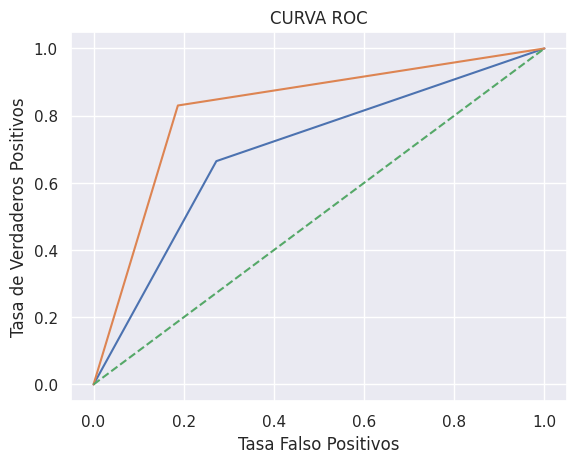

In [ ]:
fprnb,tprnb,umbralnb=roc_curve(y_test,y_prect_nb)
fprdt,tprdt,umbraldt=roc_curve(y_test,y_prect_dt)
plt.plot(fprnb,tprnb)
plt.plot(fprdt,tprdt)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falso Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("CURVA ROC")
plt.show()

# BOSQUE ALEATORIO

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Declarar el bosque aleatorion
modeloBosque=RandomForestClassifier(n_estimators=20)

In [ ]:
modeloBosque=modeloBosque.fit(X_train,y_train)

In [ ]:
y_prect_ba=modeloBosque.predict(X_test)

In [ ]:
modeloBosque.score(X_test,y_test)

0.8431957566716393

In [ ]:
print('Acurracy de entrenamiento', modeloBosque.score(X_train, y_train))
print('Acurracy de datos de prueba', modeloBosque.score(X_test, y_test))
#print('Acurracy de validacion (+OOBS)', modeloBosque.oob_score_))

Acurracy de entrenamiento 0.8487711881967757
Acurracy de datos de prueba 0.8431957566716393


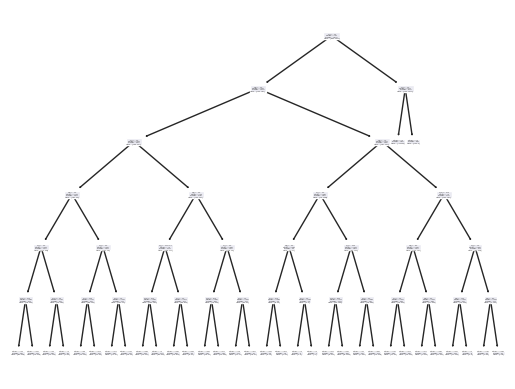

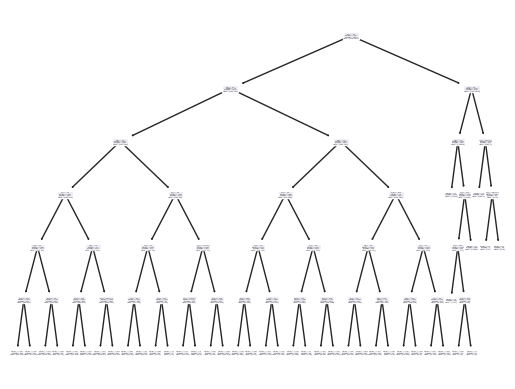

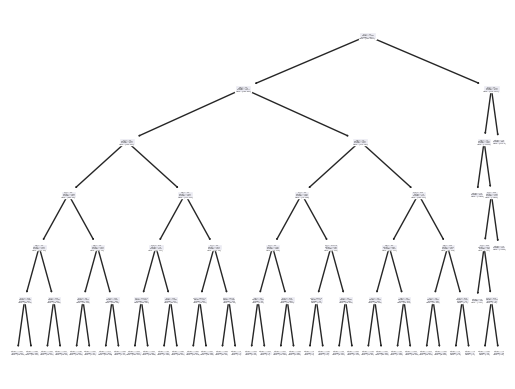

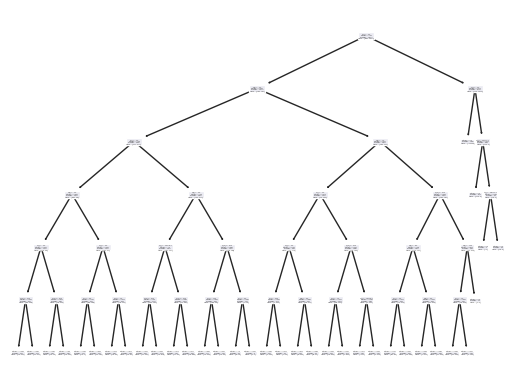

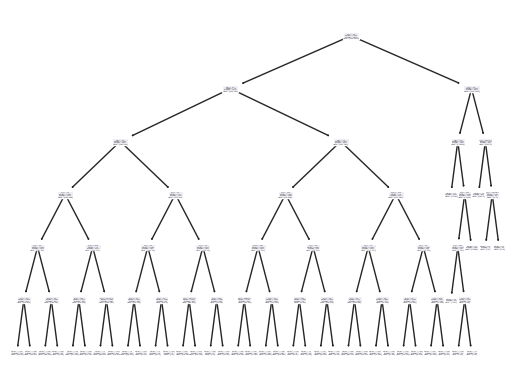

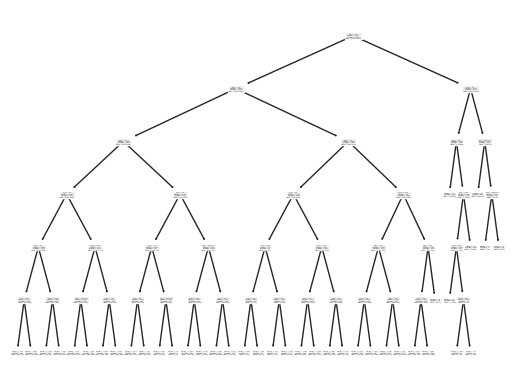

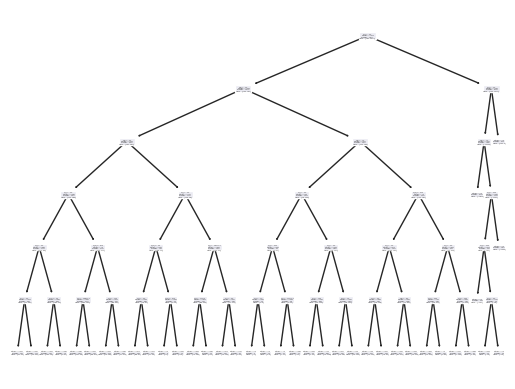

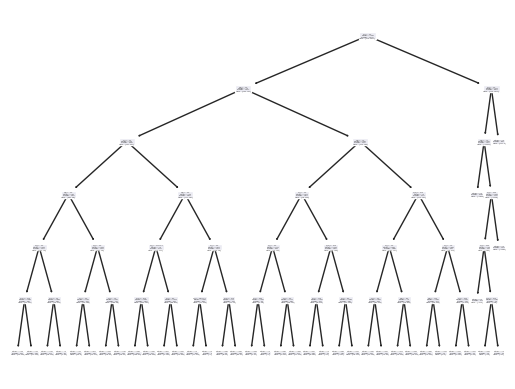

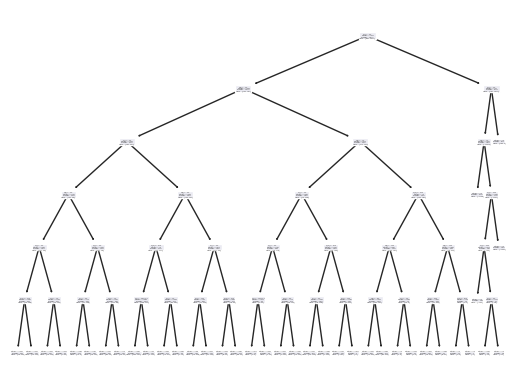

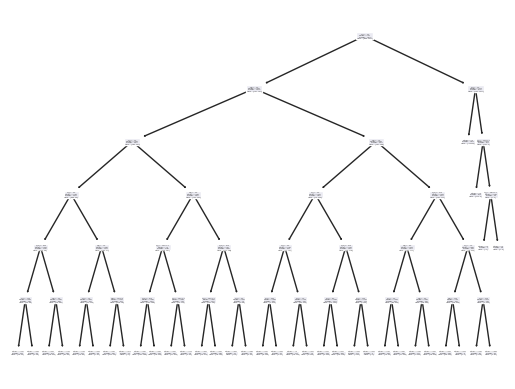

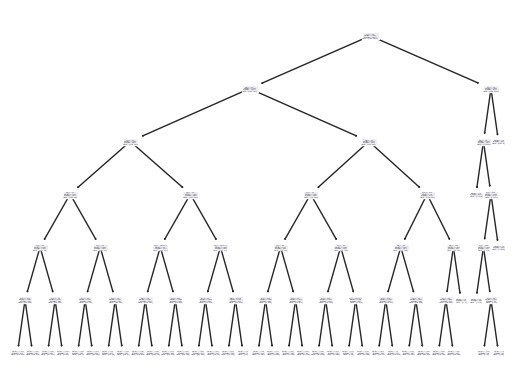

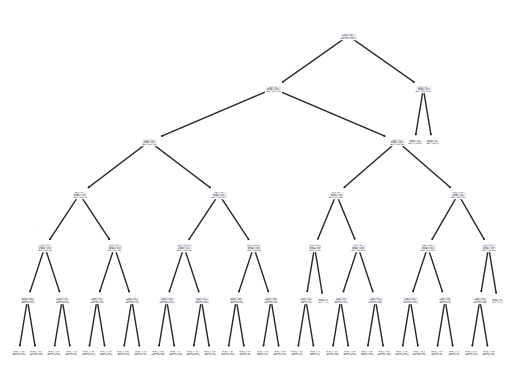

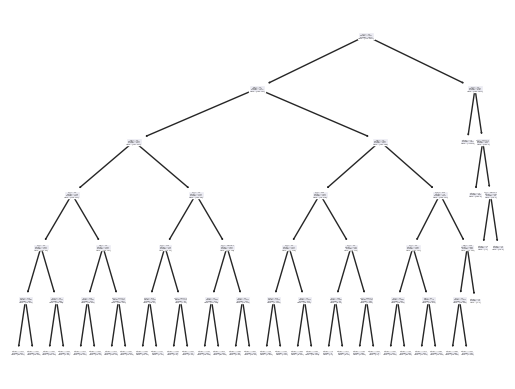

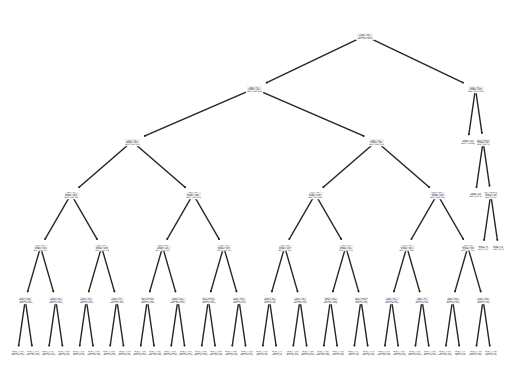

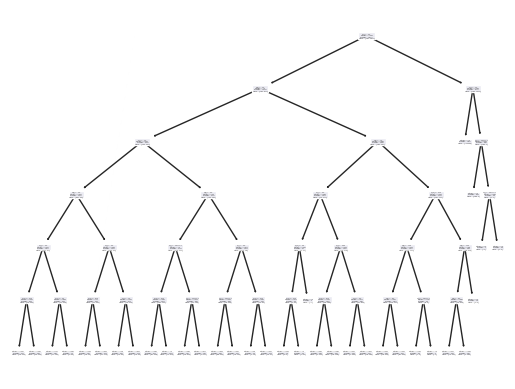

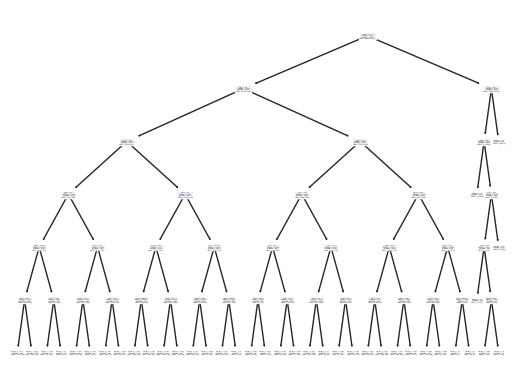

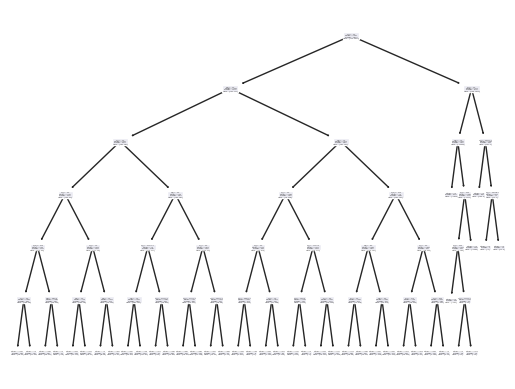

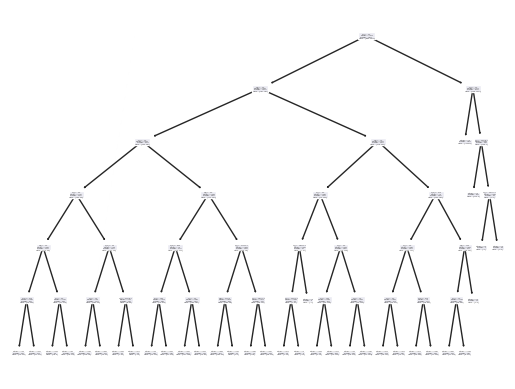

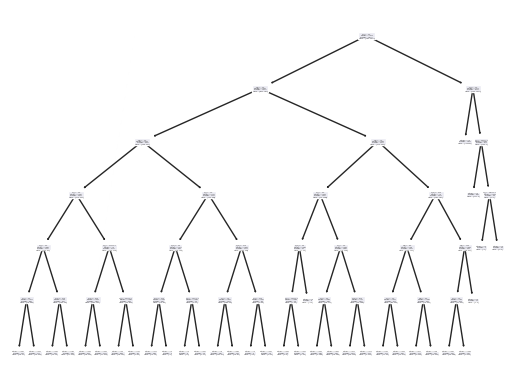

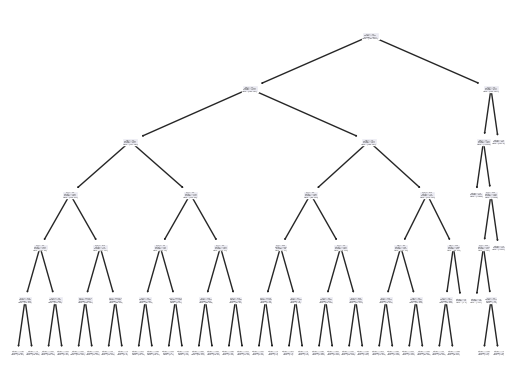

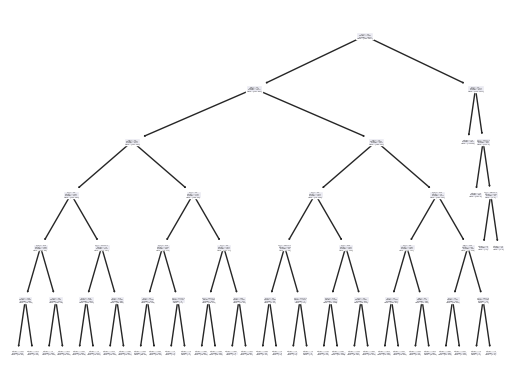

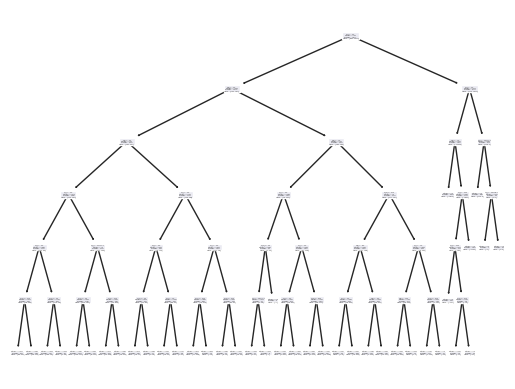

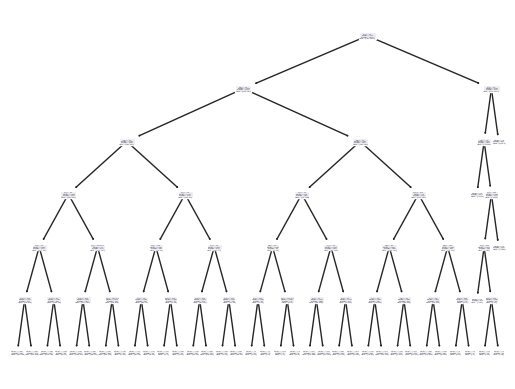

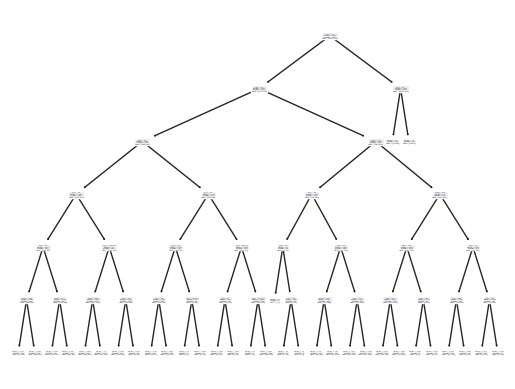

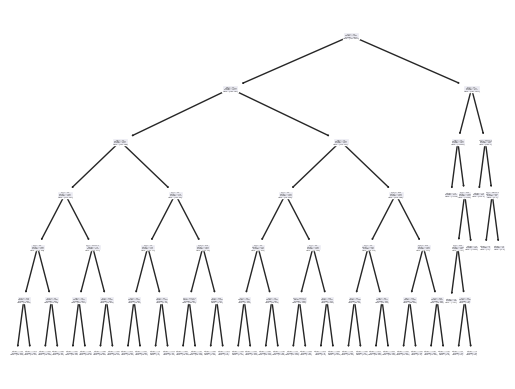

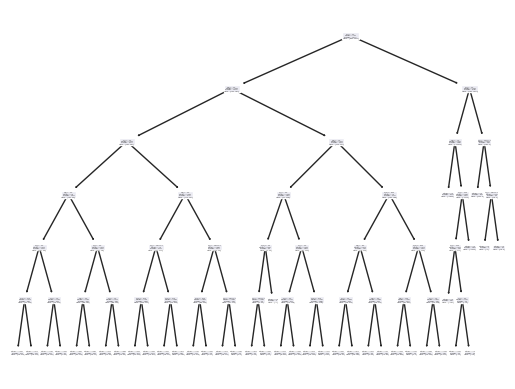

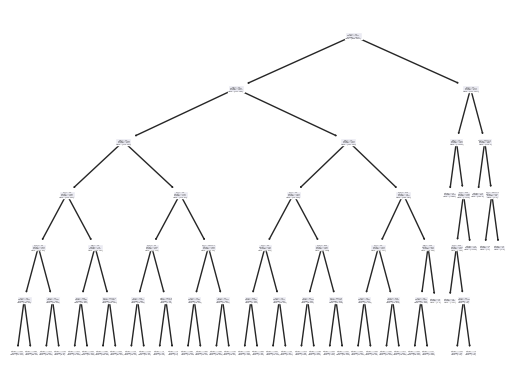

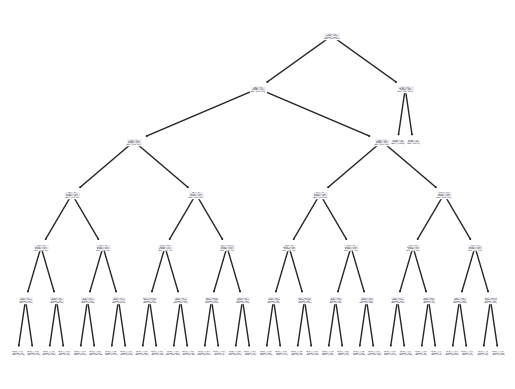

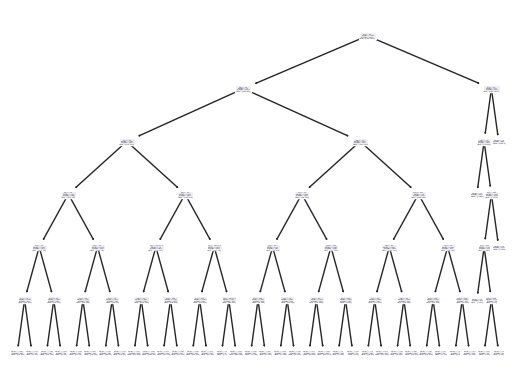

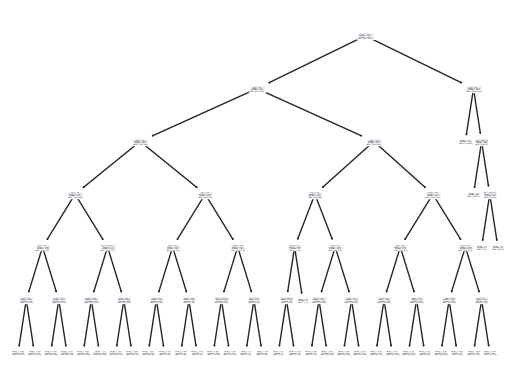

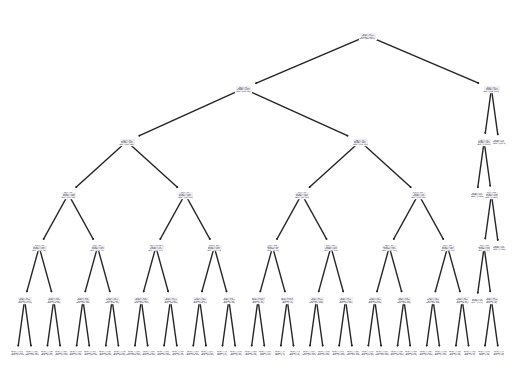

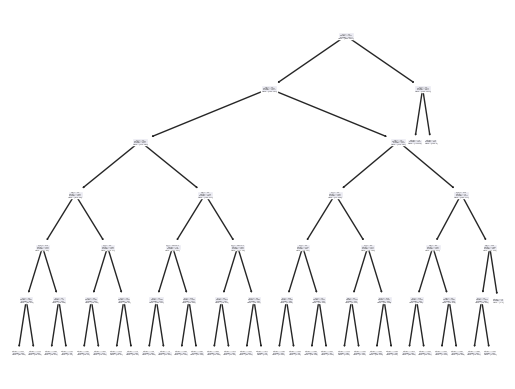

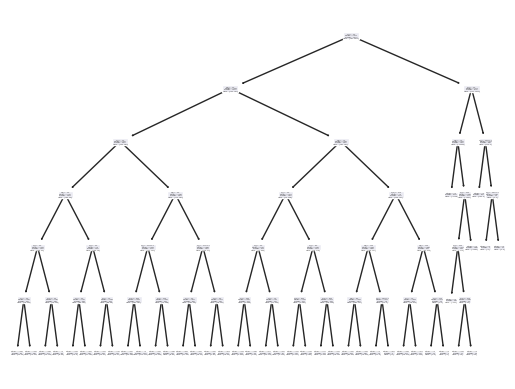

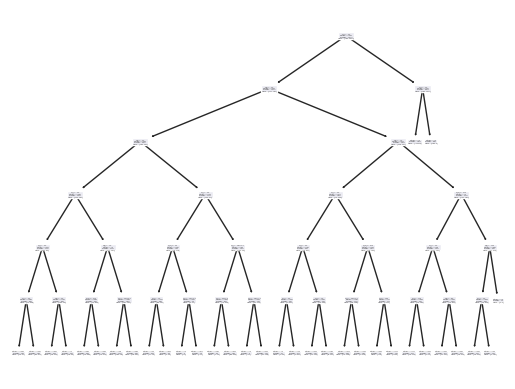

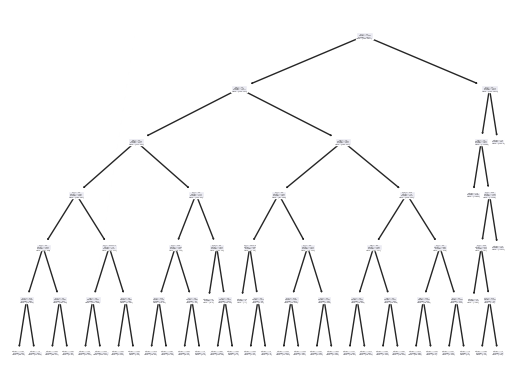

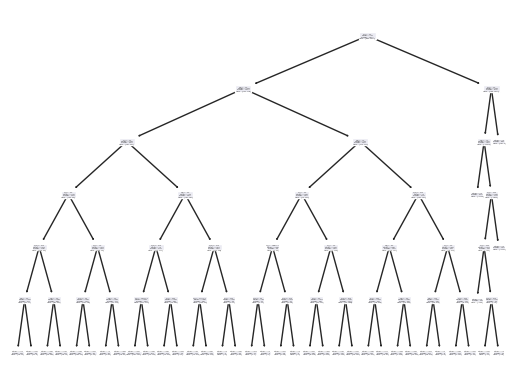

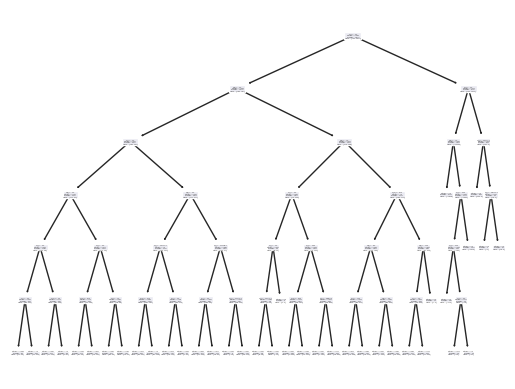

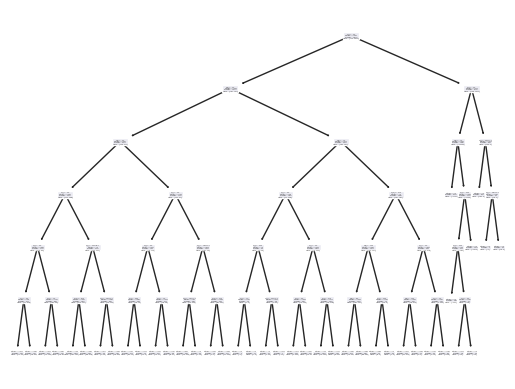

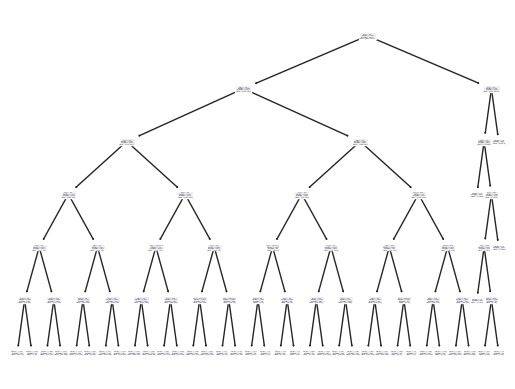

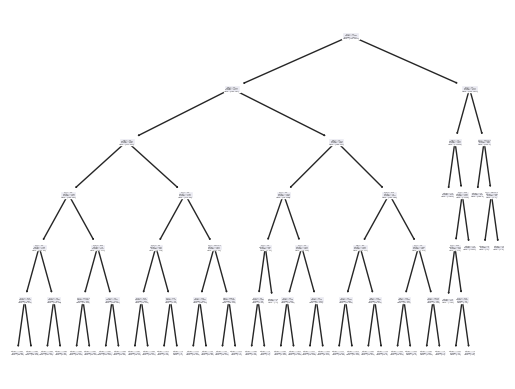

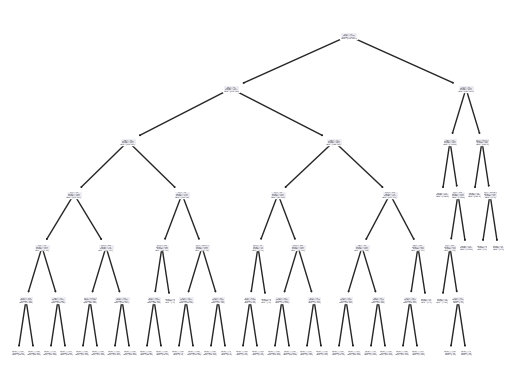

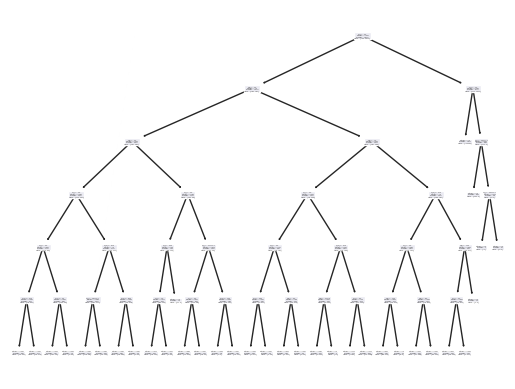

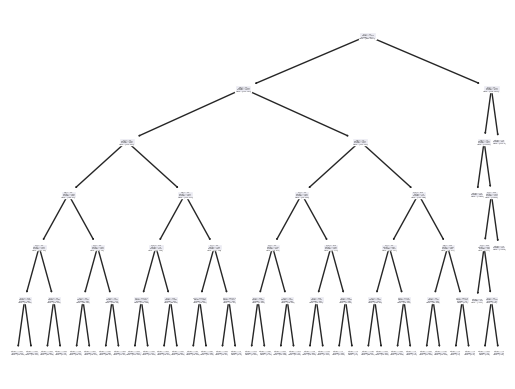

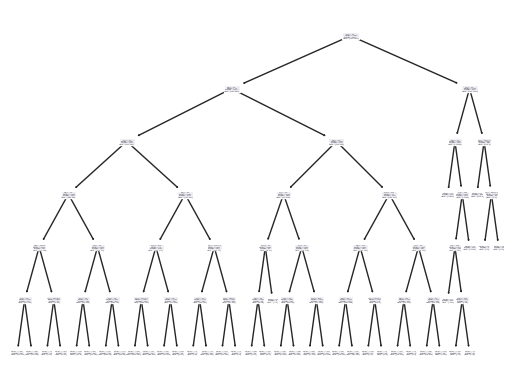

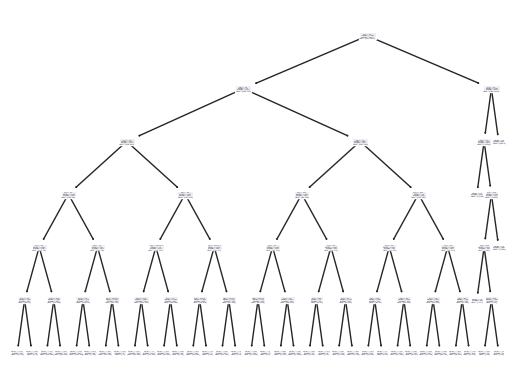

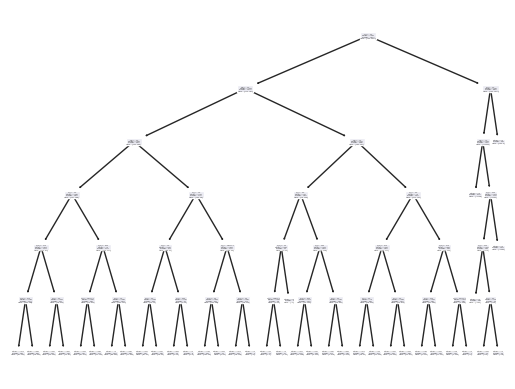

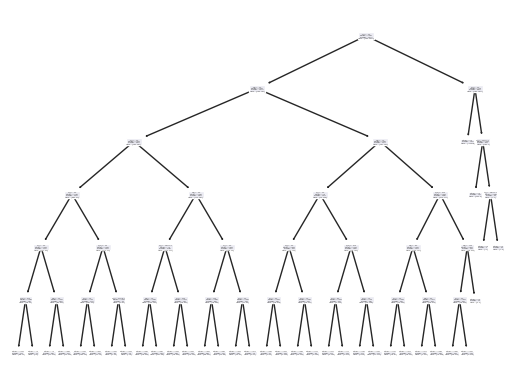

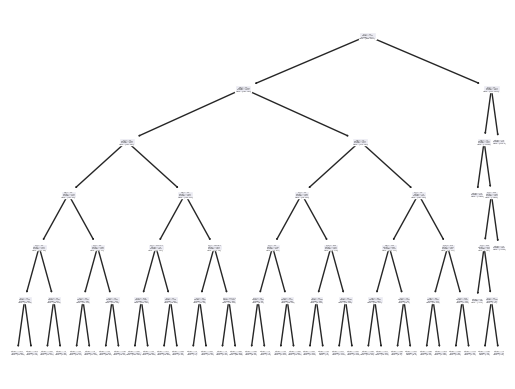

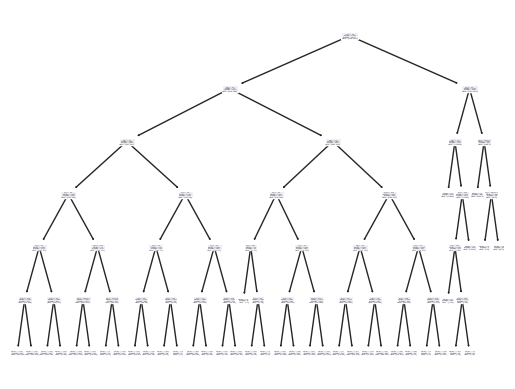

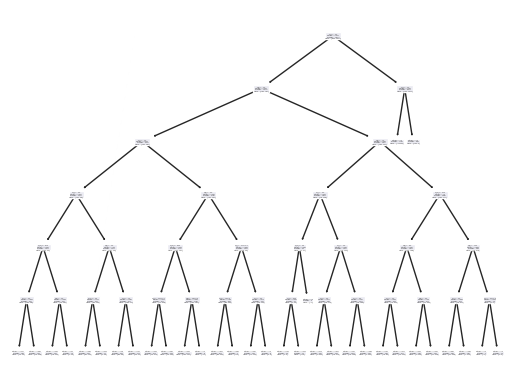

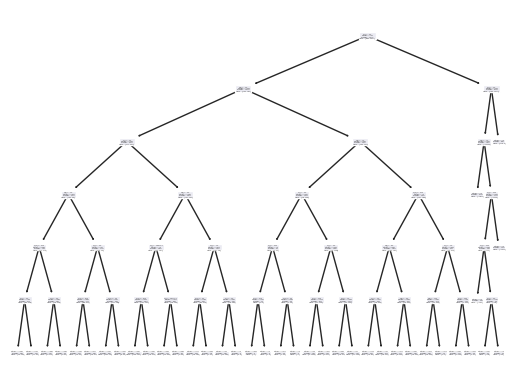

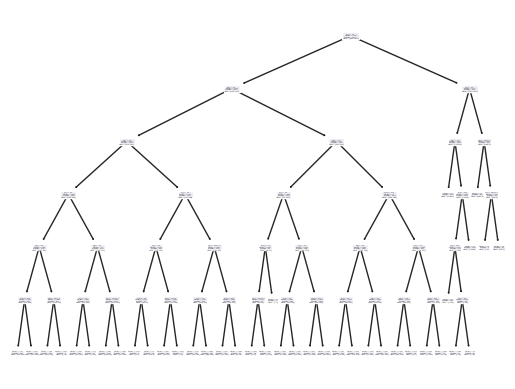

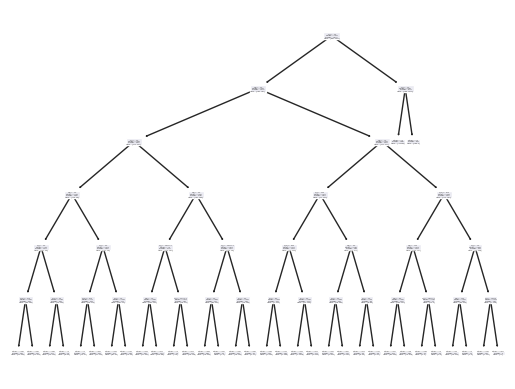

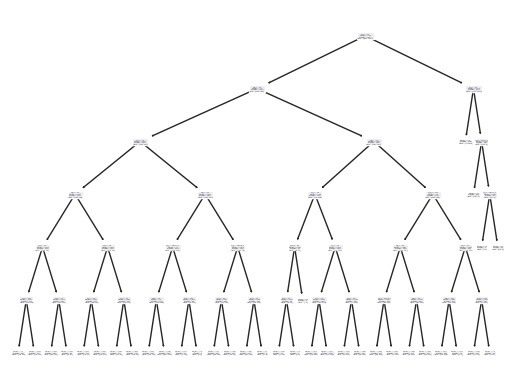

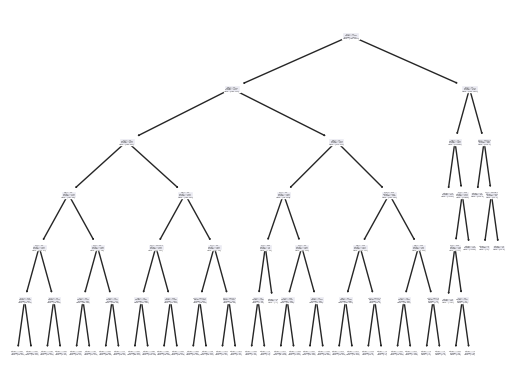

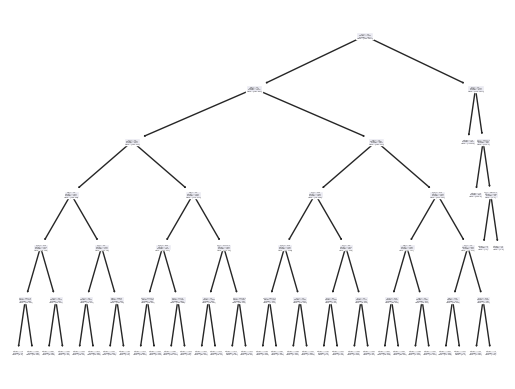

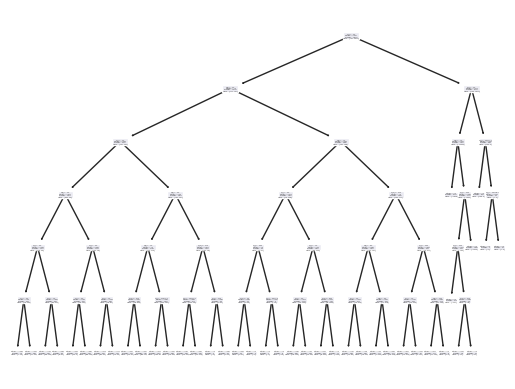

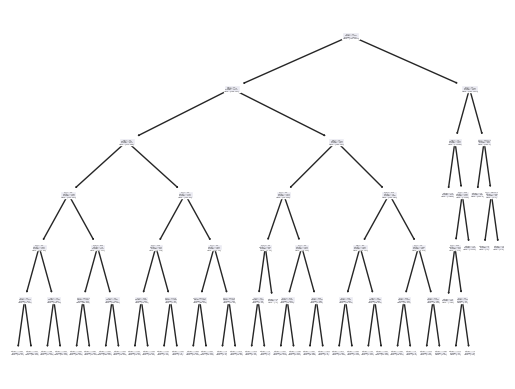

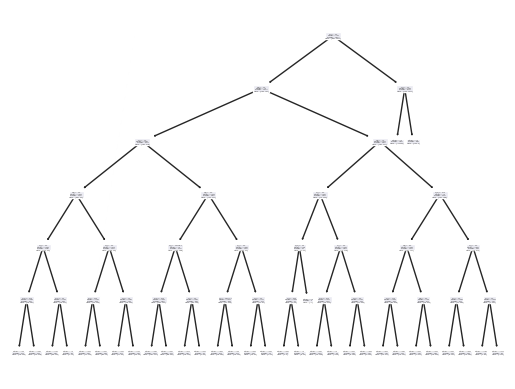

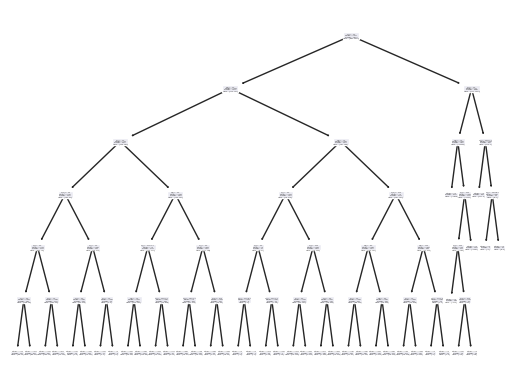

In [ ]:
for arbol in modeloBosque.estimators_:
  tree.plot_tree(arbol)
  plt.show()

In [ ]:
jb.dump(modeloBosque,"modelobosque.bin",compress=True)

['modelobosque.bin']

In [ ]:
y_predict=modeloBosque.predict(X_test)
y_predict

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
parametros= ParameterGrid(
    {'n_estimators':[20,40,60,80,100,120],
     'max_features':[3,4,5,6,7,8,9],
     'max_depth':[None,6,8,10,12,14],
     'criterion':['gini','entropy']})

In [ ]:
resultados={'parametrosfinal':[],'oobs_score':[]}

In [ ]:
for parametro in parametros:
   modeloBosque = RandomForestClassifier( oob_score=True,
                                          random_state=444,
                                          ** parametro)
   modeloBosque.fit(X,y)
   resultados['parametrosfinal'].append(parametro)
   resultados['oobs_score'].append(modeloBosque.oob_score_)
   print(f"Modelo : {parametro} \u2713", modeloBosque.oob_score_)

Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 20} ✓ 0.8339632650354751
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 40} ✓ 0.8418208341621909
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 60} ✓ 0.8442410980704197
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 80} ✓ 0.8456335786751542
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 100} ✓ 0.8465287447781977
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 120} ✓ 0.8484848484848485
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'n_estimators': 20} ✓ 0.8338638021351369
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'n_estimators': 40} ✓ 0.842152377163318
Modelo : {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'n_estimators': 60} ✓ 0.8450036469730124
Modelo : 

Dato con el valor oob mayor

Modelo : {'criterion': 'entropy', 'max_depth': 12, 'max_features': 4, 'n_estimators': 120} ✓ 0.8535574564020953

In [ ]:
# Resultados de Bosque Aleatorio
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['parametrosfinal'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oobs_score', ascending=False)
resultados = resultados.drop(columns=('parametrosfinal'))
resultados.head()

oobs_score criterion  max_depth  max_features  n_estimators
149    0.851833      gini       10.0             6           120
148    0.851734      gini       10.0             6           100
146    0.851734      gini       10.0             6            60
147    0.851502      gini       10.0             6            80
137    0.851469      gini       10.0             4           120

In [ ]:
modeloBosque = RandomForestClassifier(n_estimators=60,
                                      criterion="entropy",
                                      bootstrap=True,
                                      max_features=13,
                                      max_depth=6,
                                      oob_score=True,
                                      random_state=444)

In [ ]:
modeloBosque.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=13,
                       n_estimators=60, oob_score=True, random_state=444)

In [ ]:
scoreBosque=modeloBosque.oob_score_
scoreBosque

0.8425833830647835

In [ ]:
jb.dump(modeloBosque, "ModeloBosque.bin", compress=True)

['ModeloBosque.bin']

In [ ]:
importancia=modeloBosque.feature_importances_

In [ ]:
features=modeloBosque.feature_names_in_

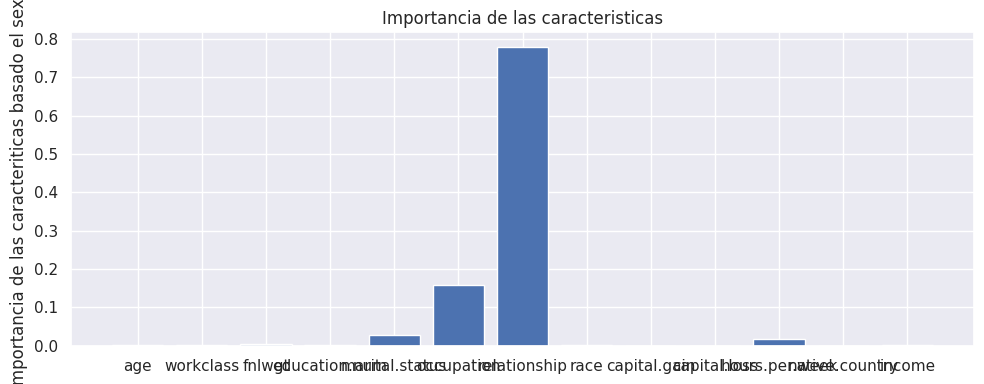

In [ ]:
importancia_pronostico=pd.Series(importancia,index=features)
fig,ax=plt.subplots(figsize=(10,4))
ax.bar(features,importancia)
ax.set_title("Importancia de las caracteristicas")
ax.set_ylabel("Importancia de las caracteriticas basado el sexo")
fig.tight_layout()

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
a=[[0,1]]

In [ ]:
a[0][1]

1

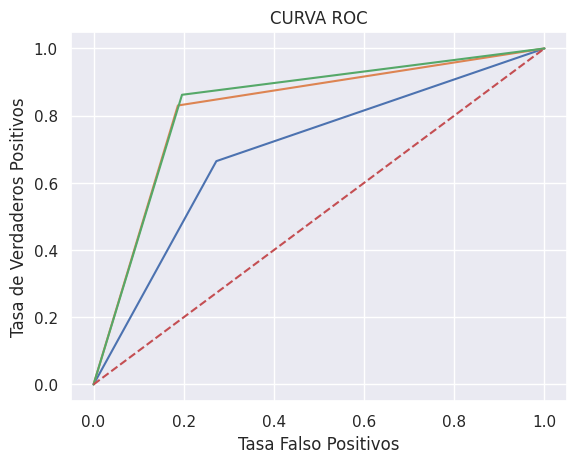

In [ ]:
fprnb,tprnb,umbralnb=roc_curve(y_test,y_prect_nb)
fprdt,tprdt,umbraldt=roc_curve(y_test,y_prect_dt)
fprba,tprba,umbraldt=roc_curve(y_test,y_prect_ba)
plt.plot(fprnb,tprnb)
plt.plot(fprdt,tprdt)
plt.plot(fprba,tprba)
plt.plot([0,1],[0,1],"--")
plt.xlabel("Tasa Falso Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("CURVA ROC")
plt.show()

En resumen, de los 3 (Modelo Gaussiano, Arbol de desción y Bosque aleatorio) modelos utilizados el modelo mas preciso es el de el bosque aleatorio. Una manera de mejorar los resultados de los otros seria hacer nivelación de datos para el modelo gaussiano (Debido a que el arbol de desción y bosque aleatorio no dependen de esto esta modificación no los afecta) y realizar un arbol extra especializado aunque esto pueda ser los valores de predicción para valores diferentes sea menor.

In [1]:
fig, ax = plt.subplots()
ax.plot(fprnb,tprnb,label = "Naive Bayes")
ax.plot(fprdt,tprdt,label = "Arbol de Decisión")
ax.plot(fprba,tprba,label = "Bosque Aleatorio")
#ax.plot(fprgbc,tprgbc,label = "GradientBoostingClassifier")
#ax.plot(fprRL,tprgRL,label = "Regresión Logística")
ax.plot([0,1],[0,1],"--")
ax.set_xlabel("Tasa Falsos Positivos")
ax.set_ylabel("Tasa de verdaderos positivos")
ax.set_title("CURVA ROC")
ax.legend()


#print('Acurracy de Naive Bayes', AccuracyNB)
#print('Acurracy de Arbol de Decisión', AccuracyArbol)
#print('Acurracy de Bosque Aleatorio', AccuracyBosque)

NameError: name 'plt' is not defined